<a href="https://colab.research.google.com/github/grodriguez1123/Metodos1_AndreaRocha_GabrielaRodriguez/blob/main/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Andrea Rocha 202311471

Gabriela Rodriguez 202320229


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy
from tqdm import tqdm

#24. Tierra plana

a) Cargue N = 50 puntos y pesos de Gauss para calcular el campo gravitacional sobre el disco.

In [45]:
Roots, Weights = np.polynomial.legendre.leggauss(50)
Roots

array([-0.9988664 , -0.99403197, -0.98535408, -0.97286439, -0.95661096,
       -0.93665662, -0.91307856, -0.88596798, -0.85542977, -0.82158207,
       -0.78455583, -0.7444943 , -0.70155247, -0.65589647, -0.60770293,
       -0.5571583 , -0.50445814, -0.44980633, -0.39341431, -0.33550025,
       -0.27628819, -0.21600724, -0.15489059, -0.0931747 , -0.03109834,
        0.03109834,  0.0931747 ,  0.15489059,  0.21600724,  0.27628819,
        0.33550025,  0.39341431,  0.44980633,  0.50445814,  0.5571583 ,
        0.60770293,  0.65589647,  0.70155247,  0.7444943 ,  0.78455583,
        0.82158207,  0.85542977,  0.88596798,  0.91307856,  0.93665662,
        0.95661096,  0.97286439,  0.98535408,  0.99403197,  0.9988664 ])

b) Defina la función de la Ecuación (4.208).

In [78]:
k= 1.942930396
def f (x,y,z,r,phi):
  return (z*r)/(((x**2+y**2+z**2+r**2)-2*(r*x*np.cos(phi))-2*(r*y*np.sin(phi)))**(3/2))

c) Defina una función para calcular la integral usando la forma de doble cuadratura

In [80]:
def doblecuadratura (x,y,z,R):
  n=50

  #cambio de variable phi
  a = 0
  b = R

  #cambio de variable r
  c = 0
  d = 2*np.pi

  t = 0.5*(((b-a)*Roots)+a+b)
  g = 0.5*(((d-c)*Roots)+c+d)

  integral = 0

  for i in range (len(Roots)):
    for j in range (len(Roots)):
      integral += (Weights[i]*(Weights[j]*f(x,y,z,t[j],g[i])))

  integral *= 0.25*(b-a)*(d-c)

  return integral*-k

(d) Verifique que el campo gravitación en el punto (O., 0., 0.2) es efectivamente g = -9.813646 m/s. (Radio = 1)

In [81]:
doblecuadratura(0,0,0.2,1)

-9.8136467869059

(e) Usando coordenadas polares:

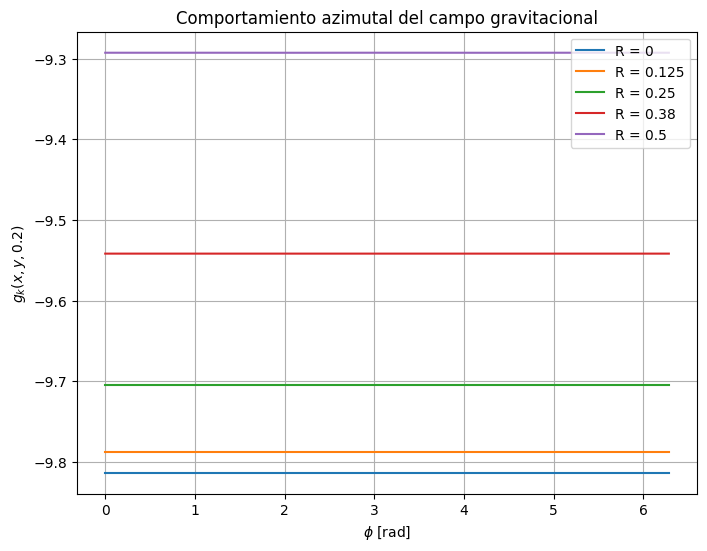

In [49]:
x = 0
y = 0
z = 0.2
R_values = [0, 0.125, 0.25, 0.38, 0.5]
phi_values = np.linspace(0, 2*np.pi, 10)

plt.figure(figsize=(8, 6))

for R in R_values:
    g_values = []
    for phi in phi_values:
        x = R * np.cos(phi)  # Coordenadas polares a cartesianas
        y = R * np.sin(phi)
        g = doblecuadratura(x, y, z,1)
        g_values.append(g)

    # Graficar cada conjunto de valores g_k para los diferentes R
    plt.plot(phi_values, g_values, label=f'R = {R}')

# Configurar etiquetas y título
plt.xlabel(r'$\phi$ [rad]')
plt.ylabel(r'$g_k(x,y,0.2)$')
plt.title('Comportamiento azimutal del campo gravitacional')
plt.legend()
plt.grid(True)
plt.show()

(f) ¿Cómo interpreta que la gravedad no depende del ángulo sobre la tierra?

De acuerdo con la gráfica presentada, la gravedad depende únicamente del radio (R) y no del ángulo (𝜙). Se llega a esta conclusión porque el valor de la gravedad no varía al modificar el ángulo, pero sí lo hace cuando se cambia el radio. El hecho de que la gravedad no dependa del ángulo sugiere que el campo gravitacional en este contexto es simétrico respecto al eje del disco, dado que no hay variación en la distribución de masa en función de 𝜙.

(g) ¿Qué valores tiene la gravedad en el ecuador R = 0.5 y en el borde R = 1?

In [82]:
x = 0
y = 0
z = 0.2

In [85]:
#Ecuador
Re = doblecuadratura(x, y, z, 0.5)
Re

-7.673931694445802

In [86]:
#Borde
Rb= doblecuadratura(x, y, z,1)
Rb

-9.8136467869059

(h) ¿Qué podría decirle a un amig@ terraplanista con base a sus resultados teóricos?

De acuerdo a los resultados obtenidos, para una tierra plana, la gravedad en un punto depende únicamente de la distancia del punto al centro de del disco. Si la Tierra fuera plana, como sugieren los terraplanistas, entonces la gravedad debería comportarse de manera muy diferente a lo que realmente observamos. Los  resultados muestran que en un disco plano, la fuerza gravitacional sería muy diferente en el centro del disco (donde sería más fuerte) que en los bordes (donde disminuiría). En la Tierra real, la gravedad es prácticamente la misma en cualquier punto de su superficie, lo cual es una fuerte evidencia de que la Tierra es esférica y no plana.

#25. Deducción teórica de la cuadratura de Laguerre

a) Usando la formula de Rodrigues, encuentre el polinomio de Laguerre de orden 2

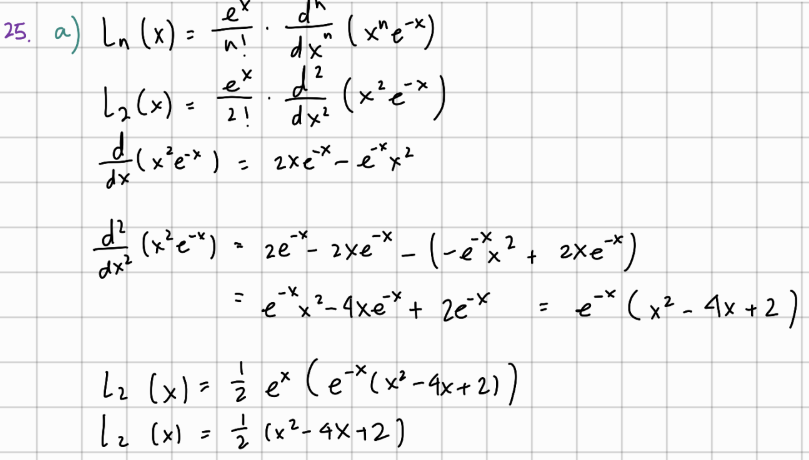

b) Encuentre las raíces del polinomio de orden 2

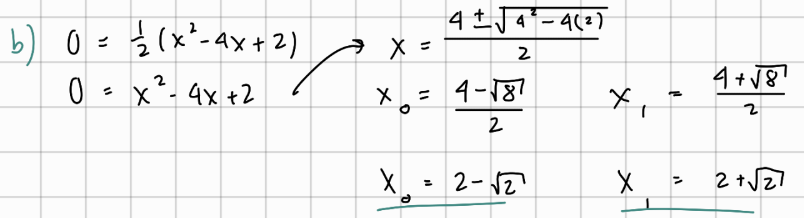

c) Encuentre los pesos de cuadratura integrando las bases cardinales con la función de peso de Laguerre σ(x) = e−x


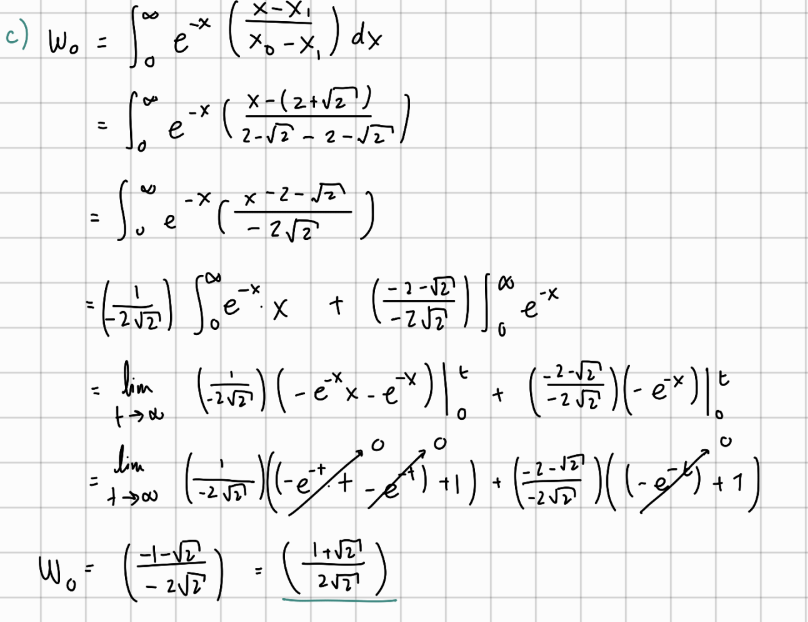

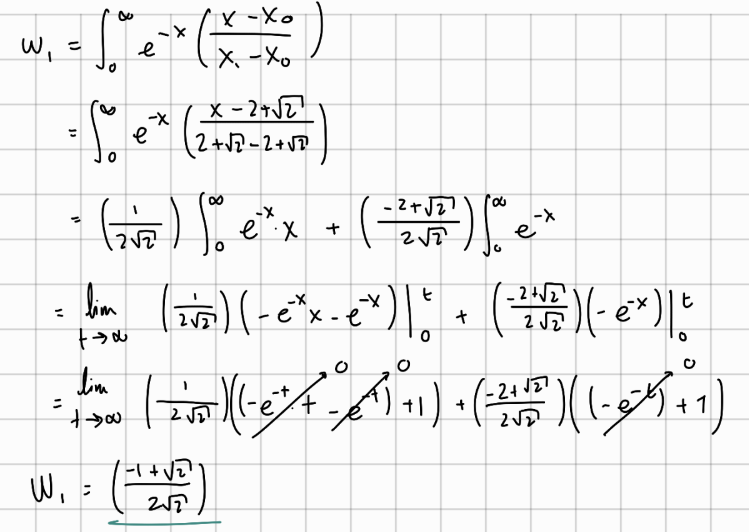

d) Muestre que la regla es exacta para un polinomio de grado tres

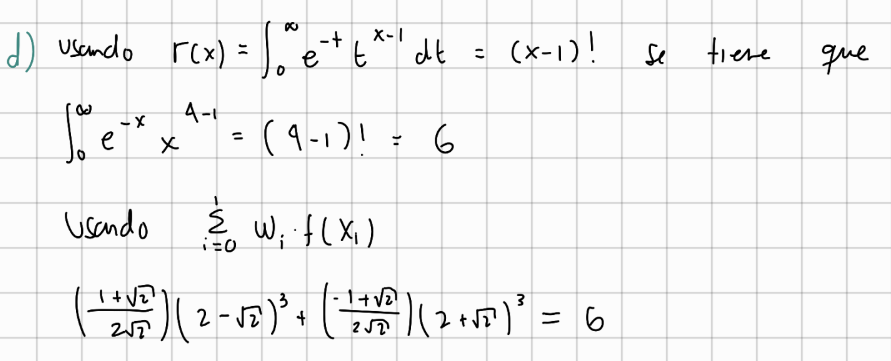

#26. Suma de Riemann como modelo de aproximación

###(Teórica)

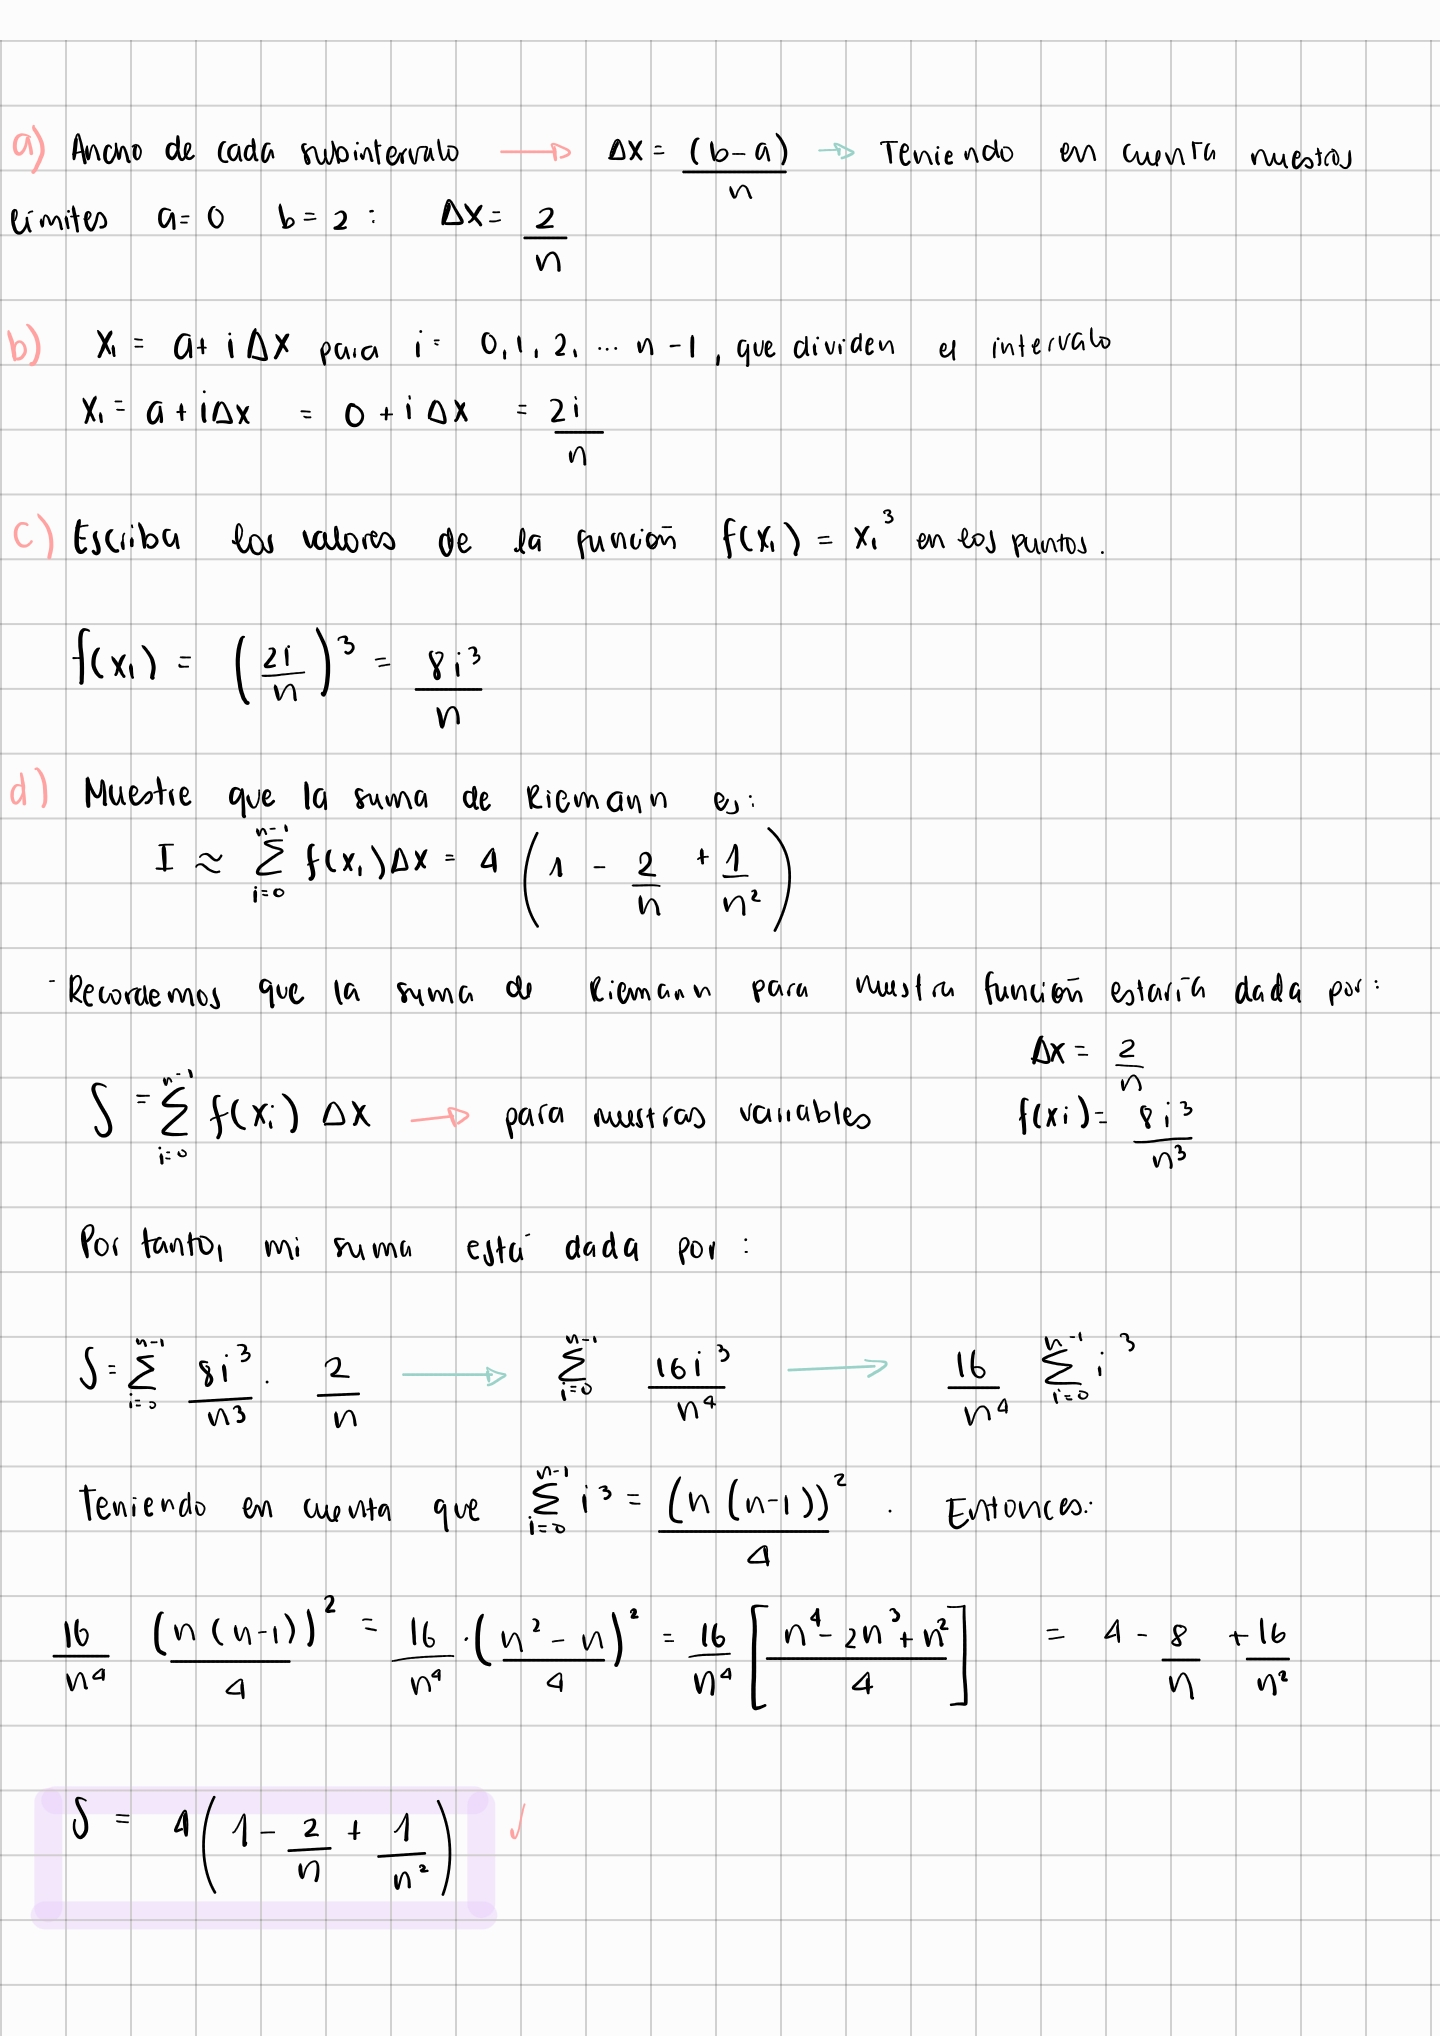

###(Computacional)

e) Escriba un código para hacer la aproximación con n=30

In [87]:
f = lambda x: (x)**3
a = 0
b = 2
n = 30

delta = (b-a)/n
x_i = np.linspace(a + delta/2, b - delta/2, n)
f_x_i = f(x_i)
suma_riemann = np.sum(f_x_i) * delta
suma_riemann

3.9977777777777783

f) Dibuje el error de la estimación como una funcipon de n

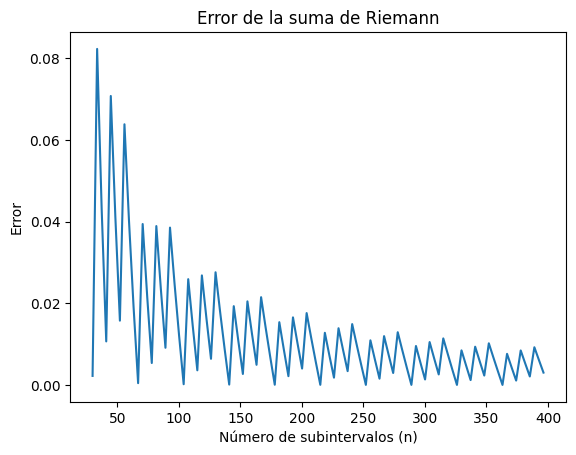

In [52]:
def f(x):
    return x**3

def suma_riemann(n):
    a = 0
    b = 2
    delta_x = (b - a) / n
    x_i = np.linspace(a + delta_x/2, b - delta_x/2, int(n))
    f_x_i = f(x_i)
    return np.sum(f_x_i) * delta_x

def error(n):
    valor_exacto = 4
    aproximacion = suma_riemann(n)
    return abs(valor_exacto - aproximacion)

n_values = np.linspace(30, 400, 100, endpoint=False)
errores = [error(n) for n in n_values]

plt.plot(n_values, errores)
plt.xlabel('Número de subintervalos (n)')
plt.ylabel('Error')
plt.title('Error de la suma de Riemann')
plt.show()

g) ¿Es la suma de Riemann una buena estrategia para resolver integrales?

La suma de Riemann no es buena estrategia para estimar integrales,pues tiene sus limitaciones y el rango de error es alto comparado al de la cuadratura de Gauss. A medida que aumenta el número de subintervalos, la aproximación mejora, pero el costo computacional también aumenta. La cuadratura de Gauss, por otro lado, utiliza puntos de evaluación específicos que minimizan el error de la aproximación para un número dado de puntos. Esto significa que, en general, la cuadratura de Gauss proporciona una mejor aproximación que la suma de Riemann para el mismo número de evaluaciones de la función.

#27 Solución numérica (con descenso de gradiente)

a) Escriba las 8 ecuaciones

In [89]:
G1=(lambda x0,x1,x2,x3,w0,w1,w2,w3: w0 + w1 + w2 + w3-2,\
    lambda x0,x1,x2,x3,w0,w1,w2,w3: w0*x0 + w1*x1 + w2*x2 + w3*x3-1, \
    lambda x0,x1,x2,x3,w0,w1,w2,w3: w0*x0**2 +w1*x1**2 + w2*x2**2 +w3*x3**2-2/3,\
    lambda x0,x1,x2,x3,w0,w1,w2,w3: w0*x0**3 +w1*x1**3 + w2*x2**3 +w3*x3**3-1/2,\
    lambda x0,x1,x2,x3,w0,w1,w2,w3: w0*x0**4 +w1*x1**4 + w2*x2**4 +w3*x3**4-2/5,\
    lambda x0,x1,x2,x3,w0,w1,w2,w3: w0*x0**5 +w1*x1**5 + w2*x2**5 +w3*x3**5-1/3,\
    lambda x0,x1,x2,x3,w0,w1,w2,w3: w0*x0**6 +w1*x1**6 + w2*x2**6 +w3*x3**6-2/7,\
    lambda x0,x1,x2,x3,w0,w1,w2,w3: w0*x0**7 +w1*x1**7 + w2*x2**7 +w3*x3**7-1/4,)

b) Modifique el código para que la función vectorial F(x) reciba las ocho variables

In [88]:
def GetF(G,r):

  n = r.shape[0]
  v = np.zeros(n)

  for i in range(n):
    v[i] = G[i](r[0],r[1],r[2],r[3],r[4],r[5],r[6],r[7])

  return v

c) Modifique el código para calcular las 64 componentes que definen el Jacobian

In [90]:
def GetJacobian(f,r,h=1e-3):

  n = r.shape[0]

  J = np.zeros((n,n))

  for i in range(n):
    for j in range(n):

      rf = r.copy()
      rb = r.copy()

      rf[j] = rf[j] + h
      rb[j] = rb[j] - h

      J[i,j] = (f[i](rf[0],rf[1],rf[2],rf[3],rf[4],rf[5],rf[6],rf[7]) - f[i](rb[0],rb[1],rb[2],rb[3],rb[4],rb[5],rb[6],rb[7]))/(2*h)

  return J

d) Use el método del descenso del gradiente para estimar los 4 pesos (wi) y los 4 puntos de  Gauss  (xi).

In [91]:
r0 = np.random.uniform(-1.,1.,size=8)

In [94]:
def Metric(G,r):
  return 0.5*np.linalg.norm(GetF(G,r))**2

def Minimizer1(G,r,lr=1e-4,epochs=int(1e3),error=1e-4):

  metric = 1
  it = 0

  M = np.array([])
  R = np.array([r])

  while metric > error and it < epochs:

    M = np.append(M,Metric(G,r))

    J = GetJacobian(G,r).T
    Vector = GetF(G,r)

    r = r - lr*np.dot(J,Vector)

    R = np.vstack((R,r))

    metric = Metric(G,r)

    it += 1

  return r

e) La tasa de aprendizaje puede ser γ= 0.01.  Cuando la métrica sea menor a 0.005 ajuste la tasa γ= 0.001 para tener una solución más precisa

In [95]:
def Metric(G,r):
  return 0.5*np.linalg.norm(GetF(G,r))**2

def Minimizer(G,r,epochs=int(1e3),error=1e-3):

  r = r.copy()

  metric = Metric(G,r)
  it = 0

  M = np.array([])
  R = np.array([r])

  while metric > error and it < epochs:
    if metric < 0.05:
      lr = 0.001
    else:
      lr = 0.01

    J = GetJacobian(G,r).T
    Vector = GetF(G,r)

    r = r - lr*(J@Vector)

    R = np.vstack((R,r))

    metric = Metric(G,r)

    it += 1

  return r

f) Use la regla encontrada para estimar la integral

In [97]:
def f(x):
  return np.cos(x)

In [125]:
r0 = np.random.uniform(-1.,1.,size=8)

In [126]:
r = Minimizer(G1,r0)

In [127]:
integral = r[4]*f(r[0])+r[5]*f(r[1])+r[6]*f(r[2])+r[7]*f(r[3])
integral
#La integral el 90% de las veces (aprox) tiene un valor de 1.6, se agradecería probar más de una vez para comprobar el reusltado.

1.6591953456545943

g) ¿Cuál es la razón de que esta estimación sea tan poco precisa?

La razón por la que esta estimación es poco precisa se debe a que no se está haciendo uso de un conjunto de polinomios y sus raíces que aseguren la condicion de ortogonalidad. En cambio, se está haciendo uso de un sistema de ecuaciones no lineales para identificar el valor de las incógnitas. Teniendo en cuenta que hay un elevado numero de incógnitas (8) y se está haciendo uso de un método iterativo (descenso de gradiente), hay una alta posibilidad de error. Se llega a esta conclusión por que los métodos iterativos son susceptibles a errores numéricos, especialmente si las funciones objetivo tienen características que dificultan la minimización. Esto puede llevar a errores en la precisión de los pesos y raíces, afectando la integral final.

Asimismo, se identifica que en R8 hay una gran cantidad de mínimos donde se evalúa la función, por lo tanto, el valor de los pesos y las raíces es propenso a cambiar, afectando el valor de la integral.

#(Álgebra lineal) 24. Estrategia de mejor inversión (algoritmo genético R^{8})

a) Definir el vector de cuotas C.

In [63]:
C = np.array([8.51,10.68,12.24,13.66,15.37,17.15,19.66,24.69])

b) Implementar la función de retorno


In [64]:
def R(w,C):
  return np.min(1000000*(w*C-1))

In [65]:
W_prueba = np.array([0.5,0.5])
C_prueba = np.array([8.51,10.68])
R(W_prueba,C_prueba)

3255000.0

c) Modificar la clase Robot para que reciba la función de retorno y el vector de cuota

In [66]:
class Robot:

  def __init__(self, C, R):

    self.cuotas = C
    self.funcion = R

d) Asegurarse de que el vector de cuotas esté normalizado, ya que es una ponderación del capital completo.

In [67]:
class Robot:

  def __init__(self, C, R):

    self.cuotas = C
    self.funcion = R

    self.r = np.random.uniform(0.,1., size=self.cuotas.shape[0])
    self.r = self.r / np.sum(self.r)  # Normalización inicial

e) Las mutaciones también deben estar normalizadas para evitar que haya inversiones negativas

In [128]:
class Robot:

  def __init__(self, C, R, rate=0.01):

    self.cuotas = C
    self.funcion = R

    self.r = np.random.uniform(0.,1., size=self.cuotas.shape[0])
    self.r = self.r / np.sum(self.r)  # Normalización inicial

    self.rate = rate
    self.Fitness = 1

  def Mutate(self):

    self.r += np.random.normal(loc=0., scale=self.rate, size=self.cuotas.shape[0])
    self.r = np.abs(self.r)  # Asegura que no haya valores negativos
    self.r = self.r / np.sum(self.r)  # Normaliza para que la suma sea 1

  def GetR(self):
    return self.r

  def SetFitness(self):
    self.Fitness = self.funcion(self.GetR(),C)

  def GetFitness(self):
      return self.Fitness

In [69]:
def Plotter(e):

  fig = plt.figure(figsize=(5,5))
  ax = fig.add_subplot(111)
  ax.set_title('Epoch: {:.0f}'.format(e),fontsize=10)

  return fig,ax

In [70]:
def GetRobots(N):

  Robots = []

  for i in range(N):
    r = Robot(C,R)
    Robots.append(r)

  return Robots

In [129]:
def Genetic(Robots, epochs=500):

    N = int(0.8 * len(Robots))  # Se escogerá el 80% de los robots
    Fitness = np.array([])

    for e in range(epochs):

        # Mutar el genoma
      for i, p in enumerate(Robots):
          p.Mutate()
          p.SetFitness()

        # Queremos medir cual es más apto
      score = [(p.Fitness, p) for p in Robots]
        # Como ordenamos
      score = sorted(score, key=lambda x: x[0],reverse=True)# De mayor a menor

        # Se seleccionan los N más aptos
      Temp = [r[1] for i,r in enumerate(score) if i < N ]  # Tomamos los N más aptos

        # Reintroducción aleatoria de algunos individuos
      for i in range(int(0.2 * len(Robots))):  # Un 20% de los robots se reintroducen aleatoriamente
          Robots[i] = Robot(C, R)

        # Asignar robots desde los más aptos
      for i, r in enumerate(Robots):
          j = i % N  # Asegurarse de no exceder el índice
          Robots[i] = copy.deepcopy(Temp[j])

        # Miramos el fitness de cada robot
      Fitness_ = [  r.GetFitness() for i,r in enumerate(Robots) ]

        # Guardamos la aptitud promedio
      Fitness = np.append(Fitness,np.mean(Fitness_))

      if e % 10 == 0:

          clear_output(wait=True)
          # Imagen para pintar

          ax,ax1 = Plotter(e)

            # Funcion de Fitness
          ax1.set_title('Learning Curve - epoch = {:}'.format(e+10))
          ax1.plot(Fitness,color='k',label='Fitness: {:.2f}'.format( Robots[0].GetFitness()))
          ax1.set_xlabel('Epoch')
          ax1.set_ylabel('Investment return')
          ax1.legend(loc='lower right')

          plt.show()

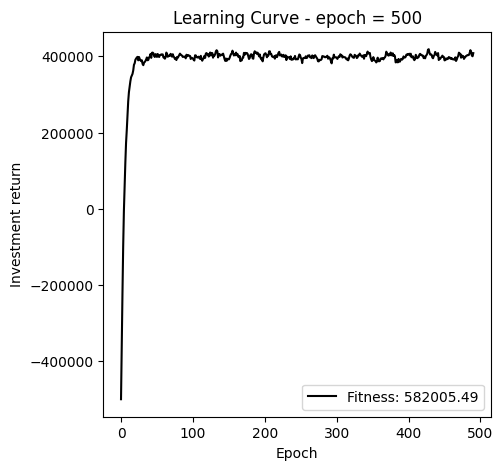

In [130]:
Robots = GetRobots(500)
Genetic(Robots)

In [131]:
vector_pesos_max = np.array([ p.GetR() for i, p in enumerate(Robots)]).mean(axis=0)
vector_pesos_max

array([0.18421508, 0.15191485, 0.13775541, 0.12597953, 0.11640472,
       0.10661608, 0.09593776, 0.08117659])

f) Finalmente, determinar cuánto dinero se debe invertir en cada opción y cuales son los retornos mínimo y máximo posibles con esa ponderación.  Se gana dinero?

In [132]:
inversion = 1000000*vector_pesos_max
inversion

array([184215.07554186, 151914.84704569, 137755.40505084, 125979.53063157,
       116404.71696682, 106616.07795191,  95937.75507921,  81176.59173209])

In [133]:
retorno_min = R(vector_pesos_max,C)
retorno_min

567670.2928612647

In [134]:
def Rmax(w,C):
  return np.max(1000000*(w*C-1))

In [135]:
retorno_max = Rmax(vector_pesos_max,C)
retorno_max

1004250.0498653672

Se observa que usando el vector de pesos máximo, calculado por medio del algoritmo evolutivo, siempre hay una ganancia en la inversión. Se llega a esta conclusión debido a que, al evaluar el vector en la funcion de retorno mínimo, siempre hay un valor positivo, lo cuál indica una ganancia. Esta ganancia puede variar entre el valor de retorno mínimo y el valor de retorno máximo calculados.